#### This notebook is created with codes and pictures from 

1) Hands-on Machine Learning with Sci-kit Learn and Tensorflow. Chapter 4. by  Auriel Geron

2) Python Data Science HAndbook. Chapter 5 by VanderPlas, Jake

You can read either of chapters as they have complete narration and descriptions


## Linear Regression

#### Linear Regression model prediction


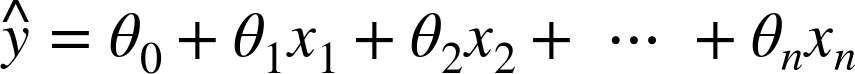



    ŷ is the predicted value.

    n is the number of features.

    x_i is the ith feature value.

    θ_j is the jth model parameter (including the bias term θ_0 and the feature weights θ1, θ2, ⋯, θn).


 #### Linear Regression model prediction (vectorized form)
 
 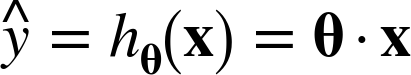
 
 
 
 θ and X are vectors
 
 

    θ is the model’s parameter vector, containing the bias term θ0 and the feature weights θ1 to θn.

    x is the instance’s feature vector, containing x0 to xn, with x0 always equal to 1.

    θ · x is the dot product of the vectors θ and x, which is of course equal to .

    hθ is the hypothesis function, using the model parameters θ.


### Matrix X form 



or 
\begin{equation}
\vec{y} = X\Theta
\end{equation}

where X is matrix with each row showing one instance of data M dims. $\Theta$ is Mx1 matrix

### Error of regression can be calculated easily

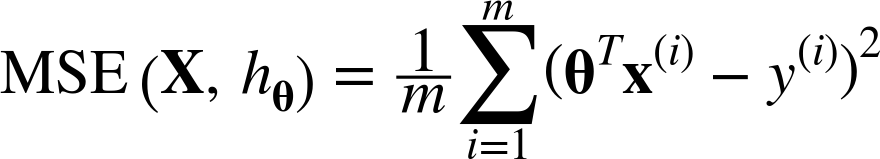

#### Task is find the value which minimize this equation

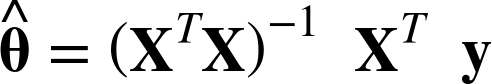

This the closed form solution (not gradient descent!). 

We use pseudo inverse instead of $ (X^T X)^{-1} (X^T X) = I $



In [22]:
import numpy as np
N = 100
X = 2 * np.random.rand(N, 1)
def f(a):
    N = a.shape[0]
    return 4 + 3 * a + np.random.randn(N, 1)
y = f(X)
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


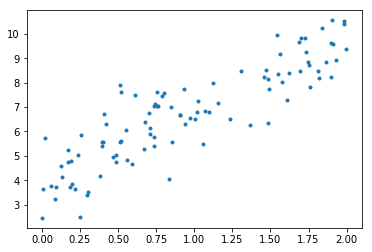

In [11]:
import matplotlib.pyplot as plt

plt.plot(X,y,'.')
plt.show()

In [23]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
#y[99]=56
#y[39]=106
print(X_b.shape)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("Best Theta thetha0, thetha1: ", theta_best)


(100, 2)
Best Theta thetha0, thetha1:  [[4.68305923]
 [2.57813622]]


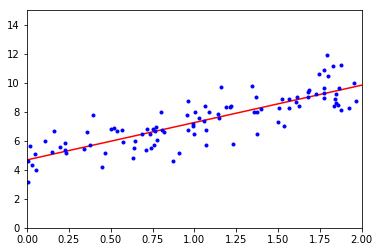

In [24]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance

y_predict = X_new_b.dot(theta_best)
y_predict

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [25]:
## least square solves a general Ax=b equation 
## Return the least-squares solution to a linear matrix equation.
# || b - a x ||^2
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6) ## least squares approximation
print(theta_best)

[[4.68305923]
 [2.57813622]]


#### Now lets solve the same problem with SKLEARN

In [26]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

y_new = lin_reg.predict(X_new)



Notes:

COmplexity is O(N^2.4)- O(N^3)



### How good is fit?

#### Error Analysis

fit score:  0.7054949206271441
 mse is same train_error 0.936195649744675
 mse is same test_error 1.2266982071754755


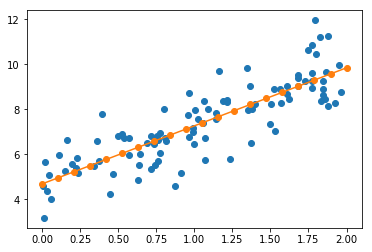

In [28]:
from sklearn.metrics import mean_squared_error
print("fit score: ", lin_reg.score(X,y)) # The best possible score is 1.0 


train_error = mean_squared_error(lin_reg.predict(X), y)
print(" mse is same train_error", train_error)

X_test = np.linspace(0,2,20).reshape(-1,1)
y_test = lin_reg.predict(X_test)

test_error = mean_squared_error(X_test, f(X_test))
print(" mse is same test_error", test_error)

plt.plot(X,y,'o')

plt.plot(X_test,y_test,'o-')


### Cross Validation 

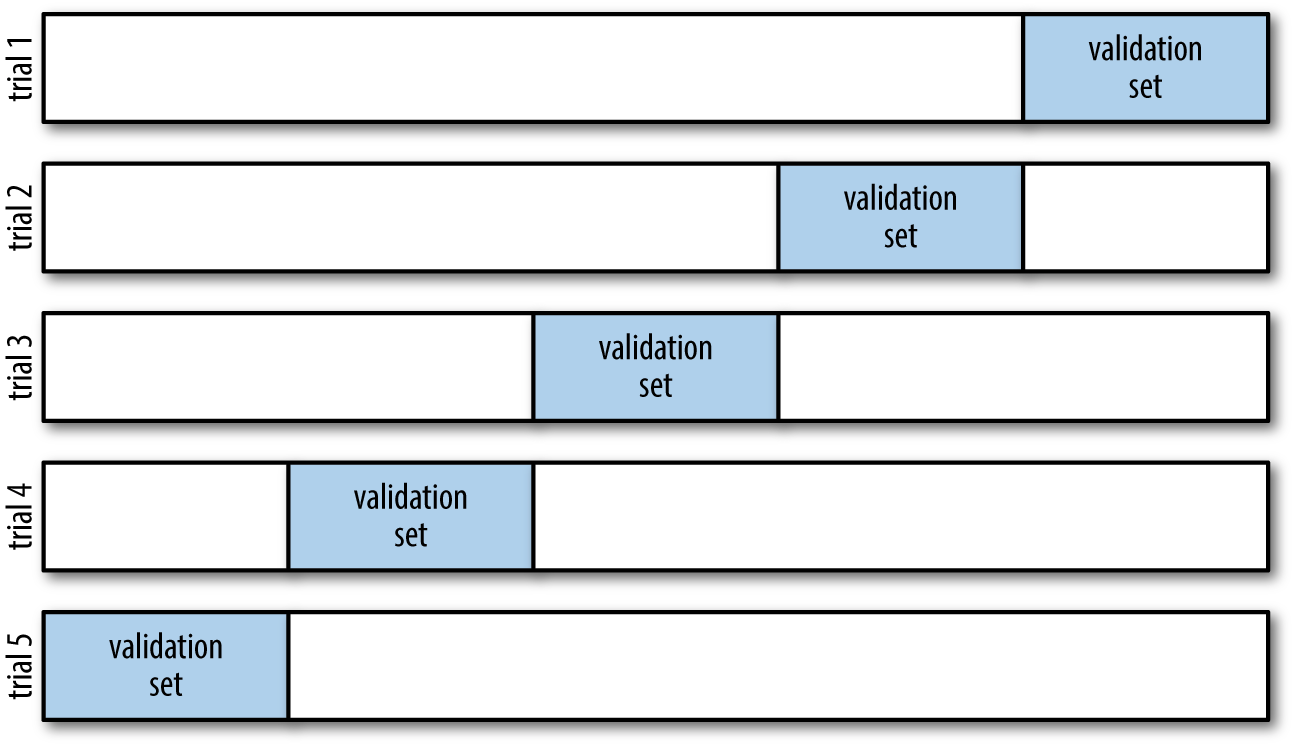

In [29]:
### you can use cross validation to divide the data randomly and repeat trials to ensure your error is close to true error

from sklearn.model_selection import train_test_split

T = 5
lin_reg = LinearRegression()
trn_error_list = []
val_error_list = []
for i in range(T):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    
    lin_reg.fit(X_train, y_train)
    
    trn_pred = lin_reg.predict(X_train)
    trn_err = mean_squared_error(y_train, trn_pred)
    
    val_pred = lin_reg.predict(X_val)
    val_err = mean_squared_error(y_val, val_pred)
    
    trn_error_list.append(trn_err)
    val_error_list.append(val_err)
    
print("trn errors: ", trn_error_list)
print("val errors: ", val_error_list)

print("mean and std trn :", np.mean(trn_error_list), np.std(trn_error_list))
print("mean and std trn :", np.mean(val_error_list), np.std(val_error_list))

trn errors:  [1.0129706171501556, 0.8581704733959141, 1.0569382741595397, 0.8513037654323805, 0.9999504469677631]
val errors:  [0.6359023260763195, 1.2756167389268236, 0.461480635694989, 1.2766079753031296, 0.7212338406395922]
mean and std trn : 0.9558667154211505 0.08473211573159838
mean and std trn : 0.8741683033281709 0.33870024293881384


In [36]:
### There is a method which performs this cross validation

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

_scorer = make_scorer(mean_squared_error, greater_is_better=False)

scores = cross_val_score(lin_reg, X,y, cv=5)
print(scores)

[0.73502095 0.48233873 0.68752658 0.61978488 0.81246037]


## Polynomial Regression

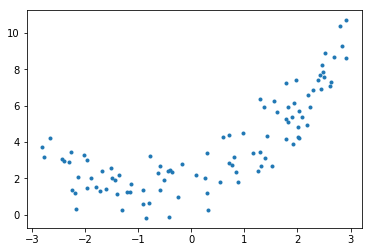

In [37]:
N = 100
X = 6 * np.random.rand(N, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(N, 1)
plt.plot(X,y,'.')

In [64]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=15, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]
#X_poly[:,0] = X
#X_poly[:,1] = X**2
#X_poly[:,2] = X**3

print("Original", X[0],"Polynomial", X_poly[0])

Original [1.77743851] Polynomial [1.77743851e+00 3.15928766e+00 5.61543956e+00 9.98109854e+00
 1.77407889e+01 3.15331615e+01 5.60482557e+01 9.96223281e+01
 1.77072563e+02 3.14735592e+02 5.59423163e+02 9.94340274e+02
 1.76737870e+03 3.14140696e+03 5.58365772e+03]


In [65]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.79838163]),
 array([[ 8.45778620e-01,  2.58223325e+00, -1.07464479e+00,
         -5.13895384e+00,  2.82484462e+00,  4.39691379e+00,
         -2.26393633e+00, -1.71803891e+00,  8.27743941e-01,
          3.35499152e-01, -1.53433642e-01, -3.18896666e-02,
          1.40360762e-02,  1.17559892e-03, -5.03158324e-04]]))

In [66]:
X_test = np.linspace(-3,3, 10)
X_test = X_test[:,np.newaxis]
X_test.shape

(10, 1)

In [67]:
X_test_poly = poly_features.fit_transform(X_test)
y_test = lin_reg.predict(X_test_poly)

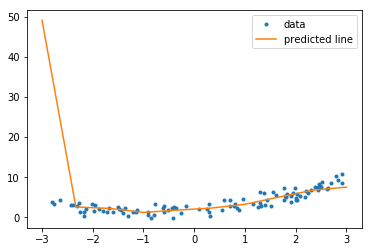

In [68]:
plt.plot(X, y,'.')
plt.plot(X_test, y_test)
plt.legend(['data', 'predicted line'])

#### Example higher degree fitting is possible

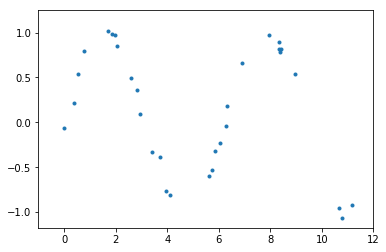

In [69]:
# Lets create more complicated data

rng = np.random.RandomState(1)
N = 50
X = 20 * rng.rand(N,1)

y = np.sin(X) + 0.1 * rng.randn(N,1)

plt.plot(X, y,'.')
plt.xlim([-1,12])


X_poly = poly_features.fit_transform(X)

(50, 15)


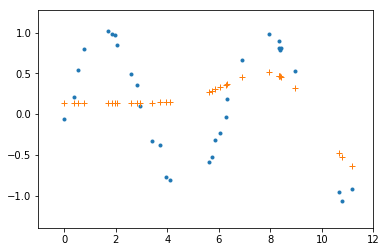

In [70]:
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
y_test = lin_reg.predict(X_poly)
plt.plot(X, y,'.')
plt.plot(X,y_test,'+')
plt.xlim([-1,12])
print(X_poly.shape)

### The above polynomial fit is not sufficient we need higher degree fits. 

In [81]:
# You can create process pipelines in sklearn
from sklearn.pipeline import make_pipeline
# pipeline joins two processes, polynomial transform and linear regression fit. 
poly_model = make_pipeline(PolynomialFeatures(7),LinearRegression())
# Here we create a linear regression for degree 7 x^7+x^6...

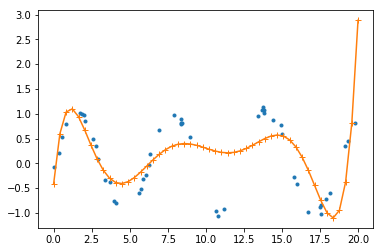

In [82]:
poly_model.fit(X,y)
x_test = np.linspace(0,20,N).reshape(-1,1)
y_test = poly_model.predict(x_test)
plt.plot(X,y,'.')
plt.plot(x_test,y_test,'+-')

### Degree of Polynomial Control model complexity

### In general over complex models cause overfit


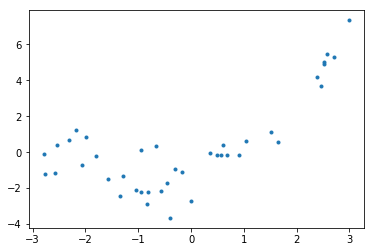

In [95]:
# lets generate 
N = 40
X = 6 * np.random.rand(N, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(N, 1)-3
plt.plot(X,y,'.')

(40, 1)
[[ 0.00000000e+00  3.05045150e+00  4.32136022e+00 -7.77851011e+00
  -7.23606116e+00  1.05650552e+01  5.68861869e+00 -6.57574051e+00
  -2.25077002e+00  2.08367603e+00  4.64959777e-01 -3.52722906e-01
  -4.75579108e-02  3.05267741e-02  1.89525908e-03 -1.06308638e-03]]


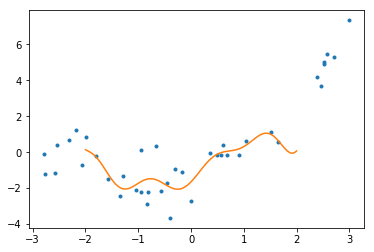

In [96]:
xfit = np.linspace(-2, 2, 100)


print(y.shape)
poly_model = make_pipeline(PolynomialFeatures(15),LinearRegression())
poly_model.fit(X,y)
print(poly_model.named_steps['linearregression'].coef_)
yfit = poly_model.predict(xfit[:, np.newaxis])


plt.plot(X, y,'.')
plt.plot(xfit, yfit);


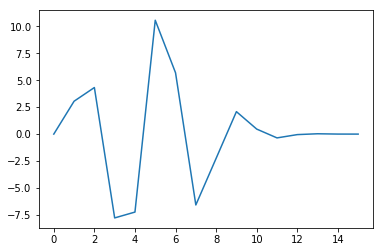

In [97]:
plt.plot(poly_model.named_steps['linearregression'].coef_[0,:])

### Example from sklearn lib

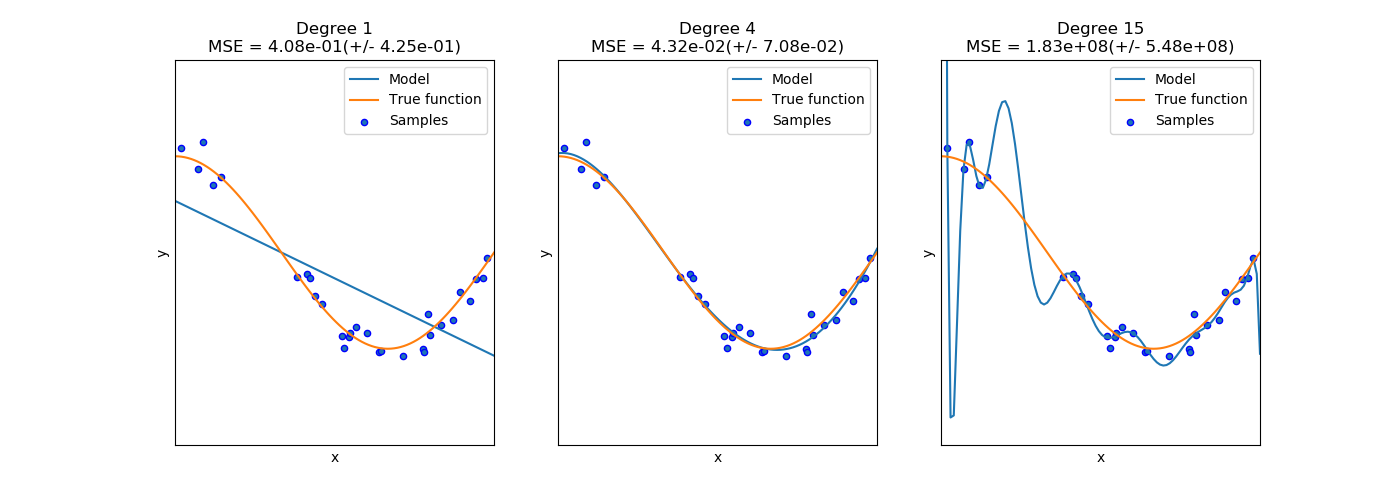

Underfit, Goodfit, Overfit

### Bias Variance trade-off

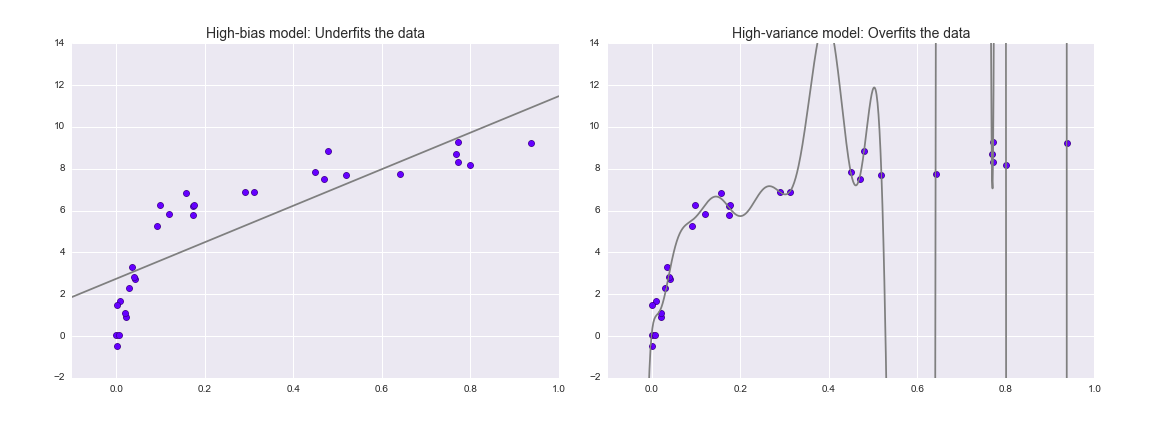

### We can use regularization to control over complex models..


#### 1) Rigde Regression L_2 Normalization

Regularization control the magnititude of Weights

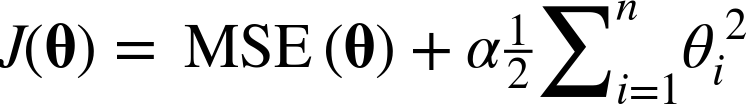

#### 2) Lasso Regression L_1 Normalization

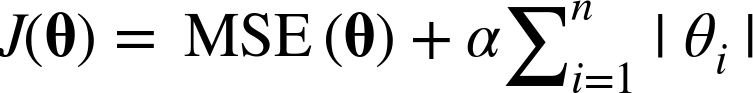


[[0.         0.82431401 0.42479863 0.02876787]]


(-2.5, 2.5)

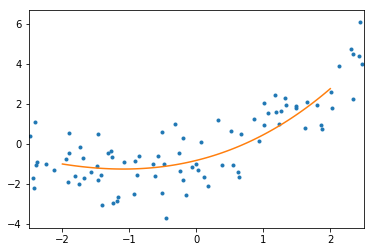

In [112]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
#ridge_reg = Ridge(alpha=1, solver="auto")
#ridge_reg.fit(X, y)
#ridge_reg.predict([[1.5]])


ridge_poly_model = make_pipeline(PolynomialFeatures(3),Ridge(alpha=10))
ridge_poly_model.fit(X,y)
print(ridge_poly_model.named_steps['ridge'].coef_)
yfit = ridge_poly_model.predict(xfit[:, np.newaxis])


plt.plot(X, y,'.')
plt.plot(xfit, yfit)
plt.xlim([-2.5,2.5])

#### NOTE: Overcomplex models fit still good if you have enough samples N is HIGH.

### You can use cross val score to find best parameters

[-0.02022418 -0.07717048 -0.00030777 -0.15640036 -0.00855927]
[0.48974523 0.71856505 0.3698825  0.5908012  0.37267581]
[0.76855601 0.80177987 0.63595463 0.79404274 0.81521759]
[0.76535595 0.79125378 0.62983502 0.77458678 0.81172429]
[0.76577476 0.78591214 0.62941774 0.7653896  0.80226376]
[0.76164617 0.77948355 0.57115641 0.75470221 0.79683254]
[0.75101985 0.77934192 0.55498814 0.75026383 0.79542005]
[0.75664397 0.78736865 0.51994857 0.73616932 0.80955316]
[0.76485202 0.79122947 0.44125269 0.74709118 0.79611122]
[ 0.76494874  0.7959561   0.42906958  0.70095203 -0.27296273]
[ 0.76431189  0.79843817  0.42556993  0.69317823 -0.62865883]
[0.72556474 0.84293583 0.48463413 0.69270985 0.3133401 ]
[ 0.72161439  0.83491838  0.48012793  0.66344297 -6.19819285]
[ 0.7140493   0.8313898   0.45190973  0.66677292 -2.12215425]
[  0.71163165   0.82121769   0.45888443   0.6729568  -13.28232947]
[ 0.71226155  0.82207501  0.46050287  0.67248134 -1.3456047 ]
[ 0.71209688  0.81874015  0.45864759  0.65996927

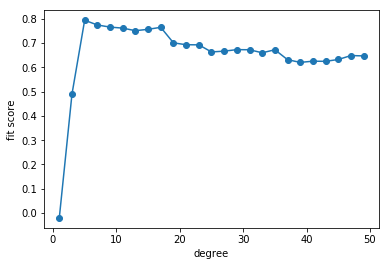

In [111]:
from sklearn.model_selection import cross_val_score

N = 100
X = 6 * np.random.rand(N, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(N, 1)-3
degree = np.arange(1, 50,2)
score_list =[]
for i in range(len(degree)):
    
    poly_model = make_pipeline(PolynomialFeatures(i),LinearRegression())

    scores = cross_val_score(poly_model,X,y,cv=5)
    print(scores)

    score_list.append(np.nanmedian(scores))
    #plt.plot(i, np.median(scores),'-o')
    #plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
    #plt.legend(loc='best')
    #plt.ylim(0, 1)
print(score_list)
plt.plot(degree,score_list ,'-o')
plt.xlabel('degree')
plt.ylabel('fit score')
plt.show()

#### Another method to prevent overfitting is Early Stopping 

#### We will revisit this in  neural networks



## Logistic Regression


Can we make a classifier as simple as linear regression?


Task: Estimate the probability that an instance belongs to a particular class


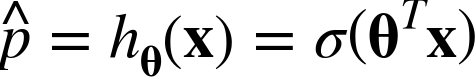

#### Logistic Function

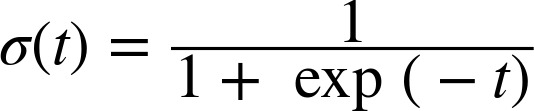

Also called sigmoid

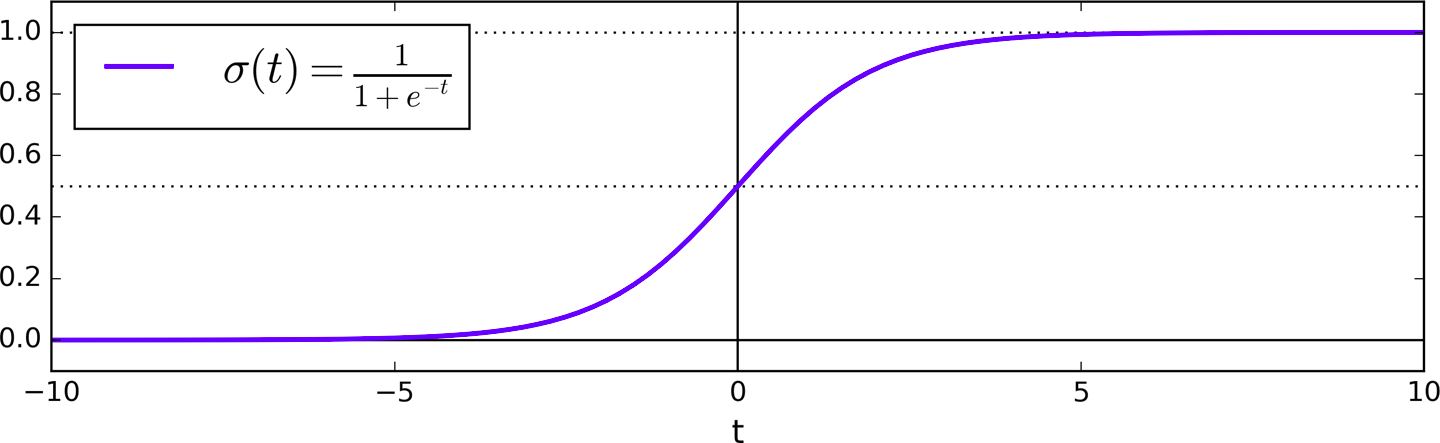

#### Logistic Regression Model

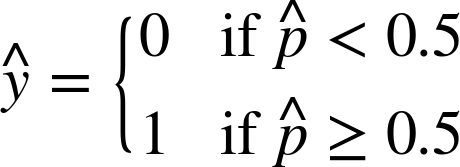





No known closed-form equation to compute the value of θ that minimizes the cost. 


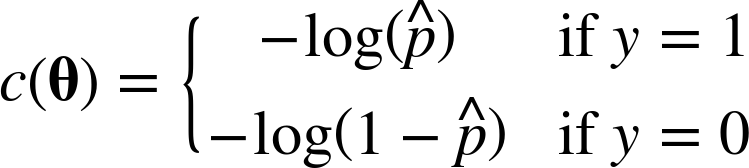

But the good news is that this cost function is convex, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum

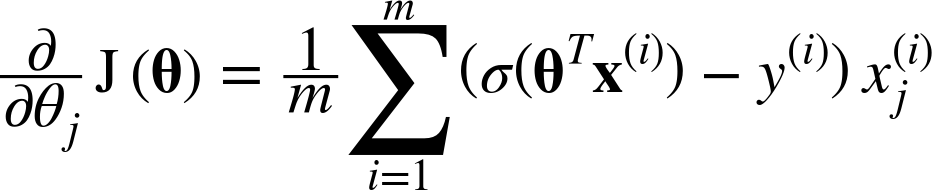


Go in the reverse direction of this function and we will find the thetha that minimizes above cost

### Decision Boundaries

Lets see this on a real classification dataset


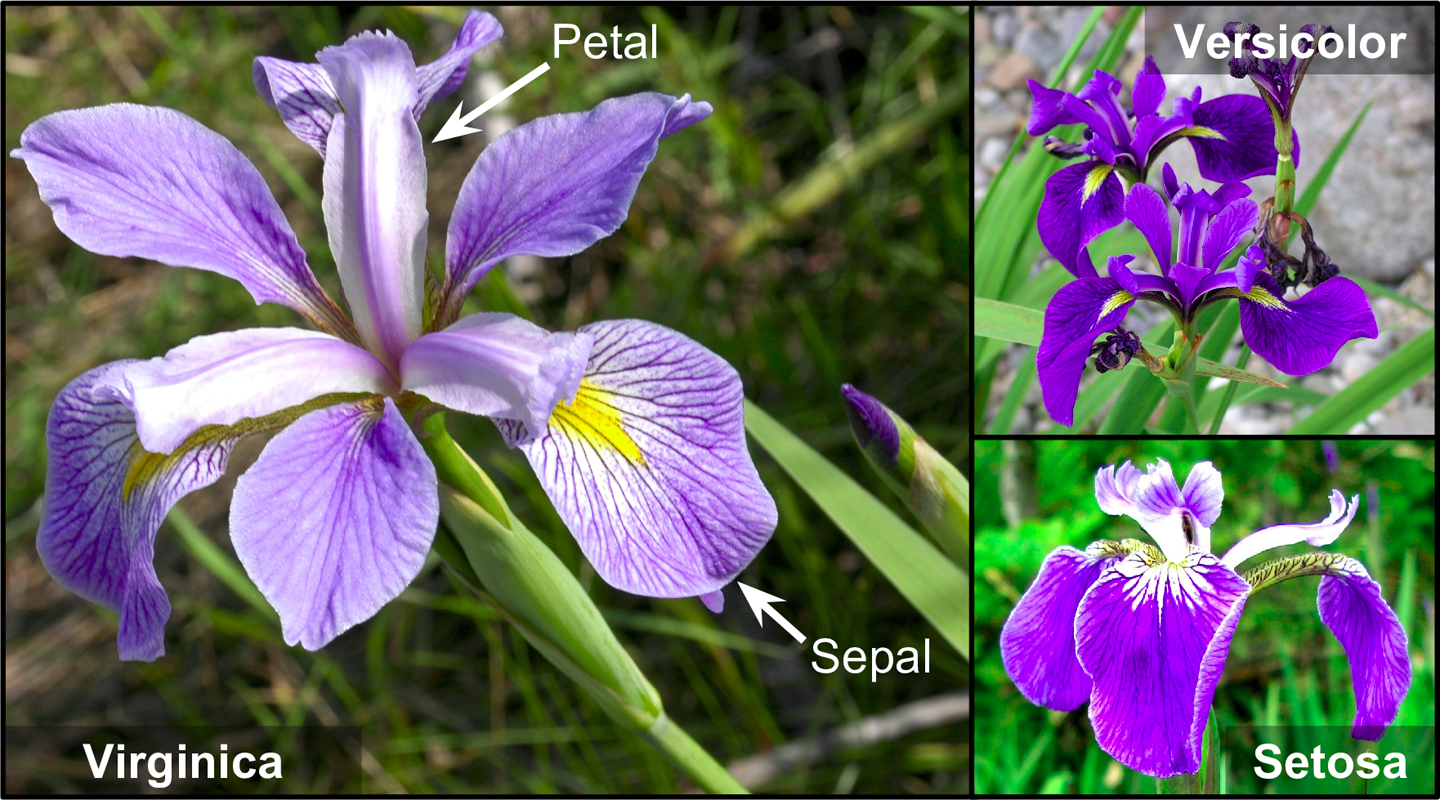

In [113]:
from sklearn import datasets
iris = datasets.load_iris()
print("keys:",iris.keys())


print("target_names", iris['target_names'])

keys: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
target_names ['setosa' 'versicolor' 'virginica']


In [116]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0
print(X)

[[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.1]
 [0.1]
 [0.2]
 [0.4]
 [0.4]
 [0.3]
 [0.3]
 [0.3]
 [0.2]
 [0.4]
 [0.2]
 [0.5]
 [0.2]
 [0.2]
 [0.4]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.1]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.3]
 [0.3]
 [0.2]
 [0.6]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [1.4]
 [1.5]
 [1.5]
 [1.3]
 [1.5]
 [1.3]
 [1.6]
 [1. ]
 [1.3]
 [1.4]
 [1. ]
 [1.5]
 [1. ]
 [1.4]
 [1.3]
 [1.4]
 [1.5]
 [1. ]
 [1.5]
 [1.1]
 [1.8]
 [1.3]
 [1.5]
 [1.2]
 [1.3]
 [1.4]
 [1.4]
 [1.7]
 [1.5]
 [1. ]
 [1.1]
 [1. ]
 [1.2]
 [1.6]
 [1.5]
 [1.6]
 [1.5]
 [1.3]
 [1.3]
 [1.3]
 [1.2]
 [1.4]
 [1.2]
 [1. ]
 [1.3]
 [1.2]
 [1.3]
 [1.3]
 [1.1]
 [1.3]
 [2.5]
 [1.9]
 [2.1]
 [1.8]
 [2.2]
 [2.1]
 [1.7]
 [1.8]
 [1.8]
 [2.5]
 [2. ]
 [1.9]
 [2.1]
 [2. ]
 [2.4]
 [2.3]
 [1.8]
 [2.2]
 [2.3]
 [1.5]
 [2.3]
 [2. ]
 [2. ]
 [1.8]
 [2.1]
 [1.8]
 [1.8]
 [1.8]
 [2.1]
 [1.6]
 [1.9]
 [2. ]
 [2.2]
 [1.5]
 [1.4]
 [2.3]
 [2.4]
 [1.8]
 [1.8]
 [2.1]
 [2.4]
 [2.3]
 [1.9]

In [117]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

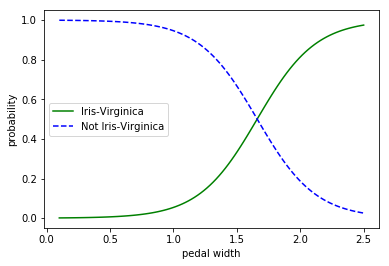

In [123]:
# lets see the decisision boundary
x_low = np.min(X)
x_high= np.max(X)
X_new = np.linspace(x_low, x_high, 100).reshape(-1, 1)

y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.xlabel('pedal width')
plt.ylabel('probability')
plt.legend()

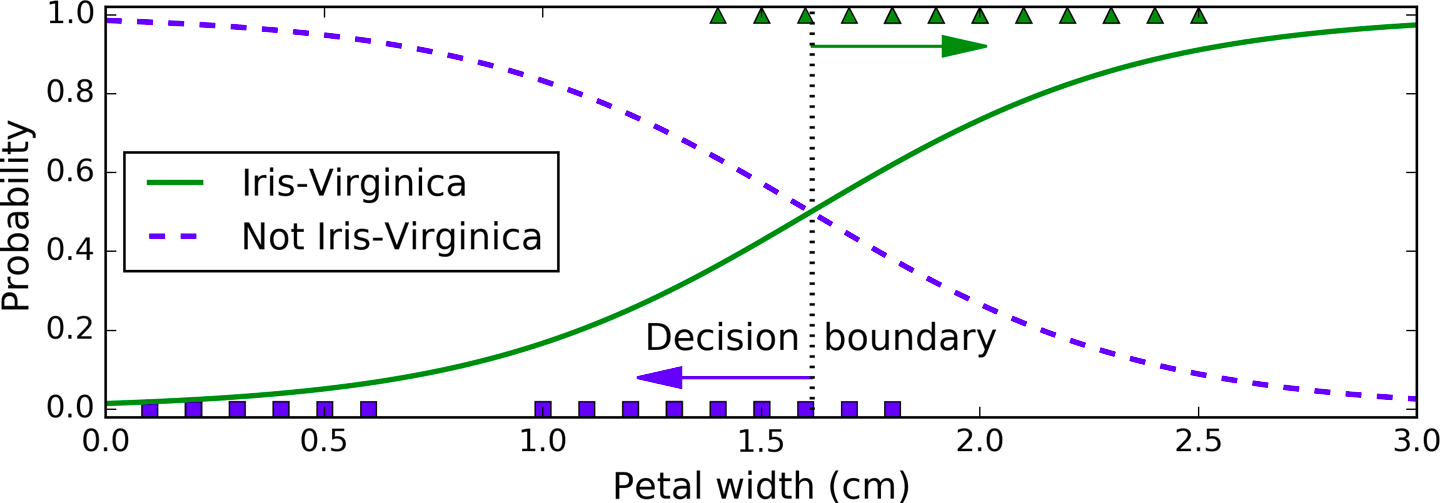

In [ ]:
log_reg.predict([[0.4], [1.0],[2.4]])

### Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly


Softmax score for class k

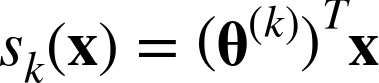


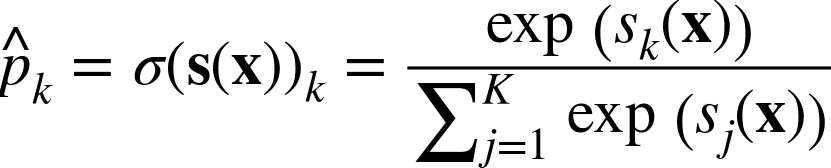



    K is the number of classes.

    s(x) is a vector containing the scores of each class for the instance x.

    σ(s(x))k is the estimated probability that the instance x belongs to class k given the scores of each class for that instance.
    
    
    Some of probabilities is 1.0. 
    σ(s(x))k can be max 1.0 min 0.0


Softmax Classifier

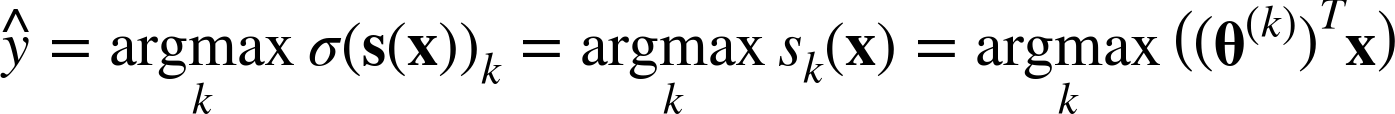

Cost function is called cross-entropy


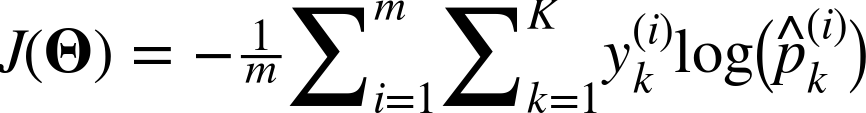

We can define gradient

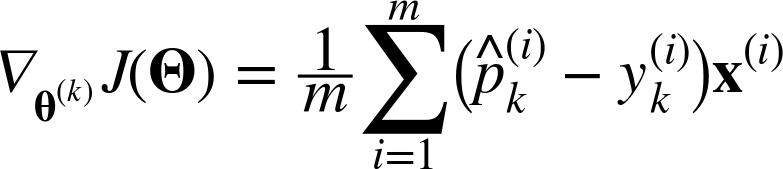

#### Lets use multiple features and multiple target classes

In [124]:


X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [130]:
softmax_reg.predict([[3,5]])

array([2])

In [132]:
# How good is the fit
print("training set:",softmax_reg.score(X,y))


scores = cross_val_score(softmax_reg, X,y, cv=9)
print(scores)
print(np.mean(scores))

training set: 0.96
[1.         0.94444444 1.         0.88888889 0.94444444 0.86666667
 1.         1.         1.        ]
0.9604938271604938


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
correct_classication 6
0.96


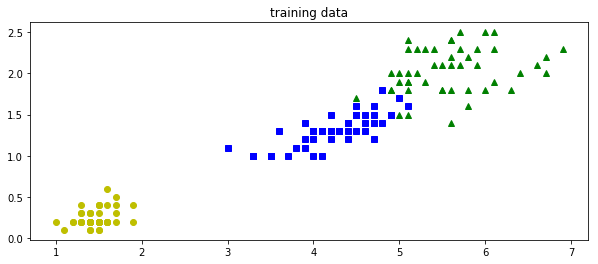

In [153]:
# In two dimensional features, we can plot and see the actual decision boundary


plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")
plt.title('training data')


print(softmax_reg.predict(X))

er_setosa = np.sum(y!=softmax_reg.predict(X))
print("correct_classication", er_setosa)

from sklearn.metrics import accuracy_score

print(accuracy_score(y, softmax_reg.predict(X)))

In [150]:
# Create test data for the plot. We do not do this with higher dims. Just for visualization

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 50).reshape(-1, 1),
        np.linspace(0, 3.5, 20).reshape(-1, 1),
    )
print(x0.shape)
X_n = np.zeros((1000,2))
X_n[:,0] = x0.flatten()
X_n[:,1] = x1.flatten()
print(X_n.shape)


y_proba = softmax_reg.predict_proba(X_n)
y_predict = softmax_reg.predict(X_n)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)


(20, 50)
(1000, 2)


/home/btek/.conda/envs/datamin/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


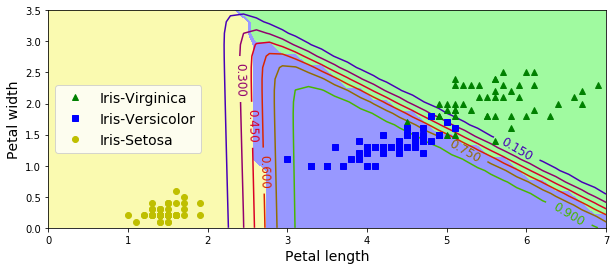

In [151]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

Questions

1) Suppose the features in your training set have very different scales. What algorithms might suffer from this, and how? What can you do about it?

Answer: Linear/logistic regression can normalize data
